In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #main plotting library
import seaborn as sns #prettier plotting library, based on matplotlib

In [ ]:
df = pd.read_csv('housing.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [ ]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [ ]:
df.dropna(subset=["SalePrice"], inplace=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0


In [ ]:
df['SalePrice'].isnull().sum()

0

In [ ]:
#good columns: LotArea, Neighborhood, YrSold, Utilities, OverallQual, OverallCond, Yearbuilt, Housingtype, BldgType, KitchenQual

(0.0, 50000.0)

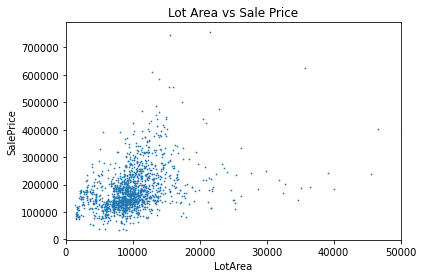

In [ ]:
lot_area_vs_sale_price = df[["LotArea","SalePrice"]]
plt.scatter("LotArea","SalePrice",data=lot_area_vs_sale_price, s=.5)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("Lot Area vs Sale Price")
plt.xlim(0,50000)

In [ ]:
correlation_df = df.corr(method='pearson')
correlation_df.nlargest(11, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'GrLivArea vs Sale Price')

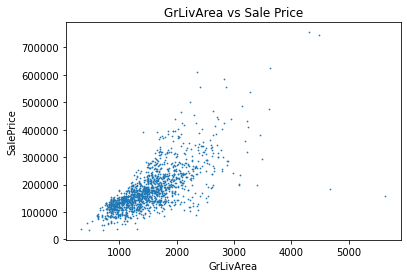

In [ ]:
Gr_Liv_Area_vs_sale_price = df[["GrLivArea","SalePrice"]]
plt.scatter("GrLivArea","SalePrice",data=Gr_Liv_Area_vs_sale_price, s=.5)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("GrLivArea vs Sale Price")

Text(0.5, 1.0, 'Overall Qual vs Sale Price')

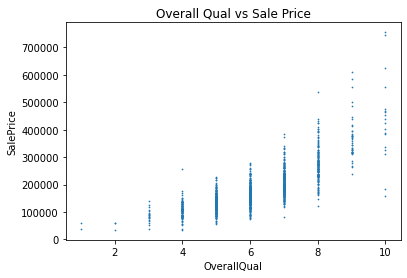

In [ ]:
overall_quality_vs_sale_price = df[["OverallQual","SalePrice"]]
plt.scatter("OverallQual","SalePrice",data=overall_quality_vs_sale_price, s=.5)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Overall Qual vs Sale Price")

Text(0.5, 1.0, 'GarageCars vs Sale Price')

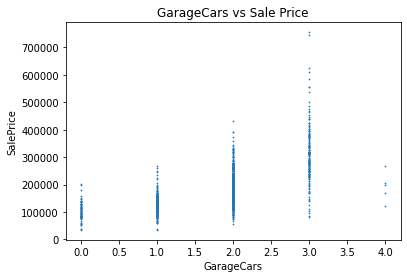

In [ ]:
garage_cars_vs_sale_price = df[["GarageCars","SalePrice"]]
plt.scatter("GarageCars","SalePrice",data=garage_cars_vs_sale_price, s=.5)
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.title("GarageCars vs Sale Price")

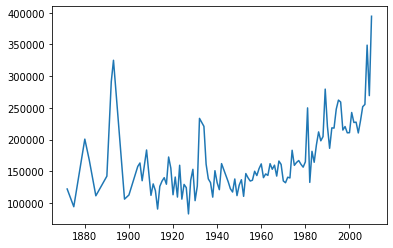

In [ ]:
avg_prices = df[["YearBuilt","SalePrice"]].groupby(['YearBuilt']).mean().reset_index()
plt.plot(avg_prices['YearBuilt'], avg_prices["SalePrice"])